In [1]:
import pandas as pd

data = [
    "10:32:53.699 -> Temperature: 31.30°C",
    "10:32:53.699 -> No Rain Detected",
    "10:32:54.730 -> Distance: 357 cm",
    "10:32:54.730 -> Humidity: 0.62",
    "10:32:54.730 -> Temperature: 31.30°C",
    "10:32:54.730 -> No Rain Detected",
    "10:32:55.748 -> Distance: 357 cm",
    "10:32:55.748 -> Humidity: 0.62",
    "10:32:55.748 -> Temperature: 31.30°C",
    "10:32:55.748 -> No Rain Detected",
    "10:32:56.781 -> Distance: 357 cm",
    "10:32:56.781 -> Humidity: 0.62",
    "10:32:56.781 -> Temperature: 31.30°C",
    "10:32:56.781 -> No Rain Detected",
    "10:32:57.818 -> Distance: 357 cm",
    "10:32:57.818 -> Humidity: 0.62",
    "10:32:57.818 -> Temperature: 31.30°C",
    "10:32:57.818 -> No Rain Detected",
    "10:32:58.858 -> Distance: 357 cm",
    "10:32:58.858 -> Humidity: 0.62",
    "10:32:58.858 -> Temperature: 31.30°C",
    "10:32:58.858 -> No Rain Detected",
    "10:32:59.858 -> Distance: 357 cm",
    "10:32:59.899 -> Humidity: 0.62",
    "10:32:59.899 -> Temperature: 31.20°C",
    "10:32:59.899 -> No Rain Detected",
    "10:33:00.920 -> Distance: 357 cm",
    "10:33:00.920 -> Humidity: 0.62",
    "10:33:00.920 -> Temperature: 31.20°C",
    "10:33:00.920 -> No Rain Detected"
]

temperature = []
humidity = []
distance = []

for line in data:
    parts = line.split(" -> ")
    if "Temperature" in parts[1]:
        temperature.append(float(parts[1].split(": ")[1].replace("°C", "").strip()))
    elif "Humidity" in parts[1]:
        humidity.append(float(parts[1].split(": ")[1].replace("%", "").strip()))
    elif "Distance" in parts[1]:
        distance.append(float(parts[1].split(": ")[1].replace("cm", "").strip()))

# Ensure all arrays have the same length by truncating to the shortest length
min_length = min(len(temperature), len(humidity), len(distance))
temperature = temperature[:min_length]
humidity = humidity[:min_length]
distance = distance[:min_length]

# Creating DataFrame
df = pd.DataFrame({
    "Temperature (C)": temperature,
    "Humidity": humidity,
    "Distance (cm)": distance,
    "labels": [1] * min_length  # Assuming labels are all 1
})

# Saving DataFrame to CSV
df.to_csv("weather_data.csv", index=False)

temperature = []
humidity = []
distance = []

for line in data:
    parts = line.split(" -> ")
    if "Temperature" in parts[1]:
        temperature.append(float(parts[1].split(": ")[1].replace("°C", "").strip()))
    elif "Humidity" in parts[1]:
        humidity.append(float(parts[1].split(": ")[1].replace("%", "").strip()))
    elif "Distance" in parts[1]:
        distance.append(float(parts[1].split(": ")[1].replace("cm", "").strip()))

# Ensure all arrays have the same length by truncating to the shortest length
min_length = min(len(temperature), len(humidity), len(distance))
temperature = temperature[:min_length]
humidity = humidity[:min_length]
distance = distance[:min_length]

# Create DataFrame
df = pd.DataFrame({
    "Temperature (C)": temperature,
    "Humidity": humidity,
    "Distance (cm)": distance,
    "labels": [1] * min_length  # Assuming labels are all 1
})

# Save DataFrame to CSV
df.to_csv("D:/kaggle/Rain prediction/weather_data.csv", index=False)

In [2]:
df

,Temperature (C),Humidity,Distance (cm),labels
0,31.3,0.62,357.0,1
1,31.3,0.62,357.0,1
2,31.3,0.62,357.0,1
3,31.3,0.62,357.0,1
4,31.3,0.62,357.0,1
5,31.3,0.62,357.0,1
6,31.2,0.62,357.0,1


In [3]:
from keras.models import load_model
model=load_model('D:/kaggle/Rain prediction/1rain_fall.h5')

In [4]:
Distance=df['Distance (cm)']
live_data=df.drop(['Distance (cm)','labels'],axis=1)
predictions_live_data = model.predict(live_data)

1/1 [==============================] - 0s 302ms/step


In [5]:
Distance

0    357.0
1    357.0
2    357.0
3    357.0
4    357.0
5    357.0
6    357.0
Name: Distance (cm), dtype: float64

In [6]:
live_result=df['labels']

In [7]:
for prediction in predictions_live_data:
  if prediction > 0.5:
    print("Rain is likely")
  else:
    print("Snow is likely")

Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely
Rain is likely


In [8]:
import numpy as np
live_predicted = np.where(predictions_live_data > 0.5, 1, 0)


from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(live_predicted, live_result)  # Use y_predicted instead of predict

cm1 

array([[7]], dtype=int64)

<Axes: >

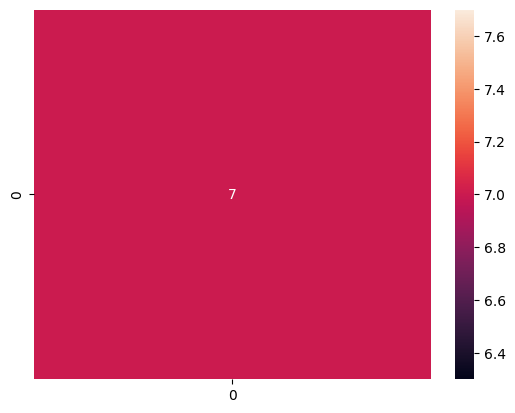

In [10]:
import seaborn as sns
sns.heatmap(cm1, annot=True, fmt='d')

In [11]:
distance = pd.DataFrame(Distance)
live_predicted = pd.DataFrame(live_predicted)
concatenated_df = pd.concat([distance, live_predicted], axis=1)

# Applying the condition
condition = (concatenated_df['Distance (cm)'] <= 357) & (concatenated_df[0] == 1)

# Converting boolean values to True or False in the condition list
condition = condition.tolist()


print(condition)

[True, True, True, True, True, True, True]


In [12]:
# If the both conditions are true the notification file will run and send the warning alert
import subprocess

def run_B():
    subprocess.run(["python", r"D:\notification\notification.ipynb"], check=True)


if condition:
    run_B()